In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## 1. Import heart_disease

In [3]:
data = pd.read_csv('heart_disease.csv')

In [4]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1


In [5]:
pd.get_dummies('ChestPainType')

,ChestPainType
0,1


## 2. Print first 5 rows


In [6]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0


## 3. Print data types of attributes


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             914 non-null    float64
 1   Sex             916 non-null    object 
 2   ChestPainType   914 non-null    object 
 3   RestingBP       917 non-null    float64
 4   Cholesterol     915 non-null    float64
 5   FastingBS       917 non-null    float64
 6   RestingECG      916 non-null    object 
 7   MaxHR           915 non-null    float64
 8   ExerciseAngina  917 non-null    object 
 9   Oldpeak         916 non-null    float64
 10  ST_Slope        912 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 86.2+ KB


## 4. Treat Missing values


In [8]:
data.isnull().sum()

Age               4
Sex               2
ChestPainType     4
RestingBP         1
Cholesterol       3
FastingBS         1
RestingECG        2
MaxHR             3
ExerciseAngina    1
Oldpeak           2
ST_Slope          6
HeartDisease      0
dtype: int64

In [9]:
data.fillna(0, inplace = True)

In [10]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
data[data.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [12]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA', 0], dtype=object)

In [13]:
data[data['ChestPainType'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
136,43.0,F,0,120.0,215.0,0.0,ST,175.0,N,0.0,Up,0
401,51.0,M,0,130.0,0.0,1.0,ST,163.0,N,0.0,Flat,1
662,44.0,M,0,110.0,197.0,0.0,LVH,177.0,N,0.0,Up,1
837,57.0,M,0,150.0,168.0,0.0,Normal,174.0,N,1.6,Up,0


In [14]:
data['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136.,   0., 115., 100.,
       124., 113., 125., 145., 112., 132., 118., 170., 142., 190., 135.,
       180., 108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,
        95.,  80., 137., 185., 165., 126., 152., 116., 144., 154., 134.,
       104., 139., 131., 141., 178., 146., 158., 123., 102.,  96., 143.,
       172., 156., 114., 127., 101., 174.,  94., 148., 117., 192., 129.,
       164.])

In [15]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
12,39.0,M,ATA,0.0,204.0,0.0,Normal,145.0,N,0.0,Up,0
449,55.0,M,NAP,0.0,0.0,0.0,Normal,155.0,N,1.5,Flat,1


## 5. Print 5 number summary

In [16]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.319172,132.265795,198.319172,0.233115,136.382353,0.887364,0.553377
std,10.036655,19.018534,109.766688,0.423046,26.615170,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,222.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 6. check unique values

In [17]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [18]:
data['Age'].unique()

array([40., 49., 37., 48., 54.,  0., 45., 58., 39., 42., 38., 43., 60.,
       36., 44., 53., 52., 51., 56., 41., 32., 65., 35., 59., 50., 47.,
       31., 46., 57., 55., 63., 66., 34., 33., 61., 29., 62., 28., 30.,
       74., 68., 72., 64., 69., 67., 73., 70., 77., 75., 76., 71.])

In [19]:
data['Sex'].unique()

array(['M', 'F', 0], dtype=object)

In [20]:
data[data['Sex'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
128,54.0,0,ATA,120.0,230.0,1.0,Normal,140.0,N,0.0,Up,0
393,38.0,0,ASY,150.0,0.0,1.0,Normal,120.0,Y,0.7,Flat,1


In [21]:
data.drop([128], axis = 0, inplace = True)

In [22]:
data.drop([393], axis = 0, inplace = True)

In [23]:
data[data['Sex'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [24]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA', 0], dtype=object)

In [25]:
data[data['ChestPainType'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
136,43.0,F,0,120.0,215.0,0.0,ST,175.0,N,0.0,Up,0
401,51.0,M,0,130.0,0.0,1.0,ST,163.0,N,0.0,Flat,1
662,44.0,M,0,110.0,197.0,0.0,LVH,177.0,N,0.0,Up,1
837,57.0,M,0,150.0,168.0,0.0,Normal,174.0,N,1.6,Up,0


In [26]:
data.drop([136], axis = 0, inplace = True)
data.drop([401], axis = 0, inplace = True)
data.drop([662], axis = 0, inplace = True)
data.drop([837], axis = 0, inplace = True)

In [27]:
data[data['ChestPainType'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [28]:
data['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136.,   0., 115., 100.,
       124., 113., 125., 145., 112., 132., 118., 170., 142., 190., 135.,
       180., 108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,
        95.,  80., 137., 185., 165., 126., 152., 116., 144., 154., 134.,
       104., 139., 131., 141., 178., 146., 158., 123., 102.,  96., 143.,
       172., 156., 114., 127., 101., 174.,  94., 148., 117., 192., 129.,
       164.])

In [29]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
12,39.0,M,ATA,0.0,204.0,0.0,Normal,145.0,N,0.0,Up,0
449,55.0,M,NAP,0.0,0.0,0.0,Normal,155.0,N,1.5,Flat,1


In [30]:
data.drop([12], axis = 0, inplace = True)
data.drop([449], axis = 0, inplace = True)

In [31]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [32]:
data['Cholesterol'].unique()

array([289., 180., 283., 214., 195., 339., 237., 208., 207., 284., 211.,
       164., 234., 273., 196., 201., 248., 267., 223., 184., 288., 215.,
       209., 260., 468., 188., 518., 167., 224., 172., 186., 254., 306.,
       250., 177., 227., 230., 294., 264., 259., 175., 318., 216., 340.,
       233., 205., 245., 194., 270., 213., 365., 342., 253., 277., 202.,
       297., 225., 246., 412., 265., 182., 218., 268., 163., 529., 100.,
       206., 238., 139., 263., 291., 229., 307., 210., 329., 147.,  85.,
       269., 275., 179., 392., 466., 129., 241., 255., 276., 282., 338.,
       160., 156., 272., 240., 393., 161., 228., 292., 388., 166., 247.,
       331., 341.,   0., 279., 198., 249., 168., 603., 159., 190., 185.,
       290., 212., 231., 222., 243., 235., 320., 187., 266., 287., 404.,
       312., 251., 328., 285., 280., 192., 193., 308., 219., 257., 132.,
       226., 217., 303., 298., 256., 117., 295., 173., 315., 281., 309.,
       200., 336., 355., 326., 171., 491., 271., 27

In [33]:
data['FastingBS'].unique()

array([0., 1.])

In [34]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH', 0], dtype=object)

In [35]:
data[data['RestingECG'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
418,60.0,M,ASY,132.0,218.0,0.0,0,140.0,Y,1.5,Down,1
850,62.0,F,ASY,160.0,164.0,0.0,0,145.0,N,6.2,Down,1


In [36]:
data.drop([418], axis = 0, inplace = True)
data.drop([850], axis = 0, inplace = True)

In [37]:
data[data['RestingECG'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [38]:
data['MaxHR'].unique()

array([172., 156.,  98., 108., 122., 170., 142., 130., 120.,  99., 140.,
       137., 150., 166., 165., 125., 160., 164., 138., 178., 112., 118.,
       127., 145.,   0., 114., 154., 155.,  87., 148., 100., 168., 184.,
       121., 153., 134.,  96., 174., 175., 144.,  82., 135., 115., 128.,
       116.,  94., 110.,  92., 180., 152., 124., 106., 185., 139., 190.,
       146., 158., 132., 176., 119., 188., 162., 105.,  90., 136., 167.,
       129., 102., 143., 103.,  91., 126.,  93., 131., 149., 123., 182.,
       141.,  77., 109., 133., 179., 113., 104.,  95.,  72.,  97., 117.,
        86.,  63., 157.,  83.,  60.,  70.,  67.,  78.,  84., 111.,  80.,
       107., 161.,  69.,  88.,  73., 159., 151., 181., 186., 163., 173.,
       169., 171., 147.,  71., 192., 195., 194., 187., 202.])

In [39]:
data['ExerciseAngina'].unique()

array(['N', 'Y', 0], dtype=object)

In [40]:
data[data['ExerciseAngina'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
903,56.0,M,ATA,130.0,221.0,0.0,LVH,163.0,0,0.0,Up,0


In [41]:
data.drop([903], axis = 0, inplace = True)

In [42]:
data[data['ExerciseAngina'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [43]:
data['Oldpeak'].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  4.4])

In [44]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 0, 'Down'], dtype=object)

In [45]:
data[data['ST_Slope'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
13,49.0,M,ASY,140.0,234.0,0.0,Normal,140.0,Y,1.0,0,1
32,54.0,M,ASY,125.0,224.0,0.0,Normal,122.0,N,2.0,0,1
148,50.0,M,ATA,120.0,168.0,0.0,Normal,160.0,N,0.0,0,0
659,59.0,M,NAP,126.0,218.0,1.0,Normal,134.0,N,2.2,0,1
833,54.0,M,NAP,120.0,258.0,0.0,LVH,147.0,N,0.4,0,0
834,44.0,M,ATA,120.0,220.0,0.0,Normal,170.0,N,0.0,0,0


In [46]:
data.drop([13], axis = 0, inplace = True)
data.drop([32], axis = 0, inplace = True)
data.drop([148], axis = 0, inplace = True)
data.drop([659], axis = 0, inplace = True)
data.drop([833], axis = 0, inplace = True)
data.drop([834], axis = 0, inplace = True)

In [47]:
data[data['ST_Slope'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [48]:
data['HeartDisease'].unique()

array([0, 1], dtype=int64)

## 7. Plot histogram of ChestPainType, RestingECG, HeartDisease

(array([167.,   0.,   0., 199.,   0.,   0., 489.,   0.,   0.,  46.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

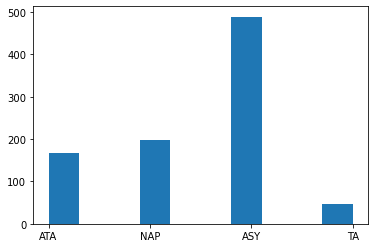

In [49]:
plt.hist(data['ChestPainType'])

(array([542.,   0.,   0.,   0.,   0., 175.,   0.,   0.,   0., 184.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

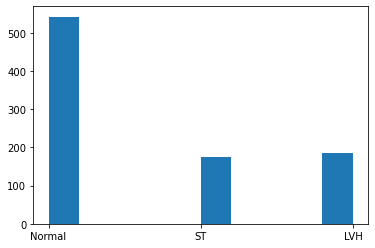

In [50]:
plt.hist(data['RestingECG'])

(array([402.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 499.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

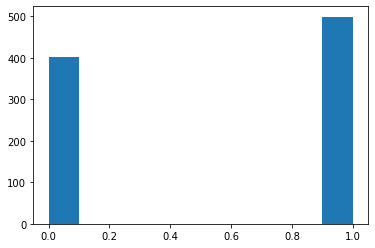

In [51]:
plt.hist(data['HeartDisease'])

## 8. Plot distribution of Age, Cholesterol, MaxHR

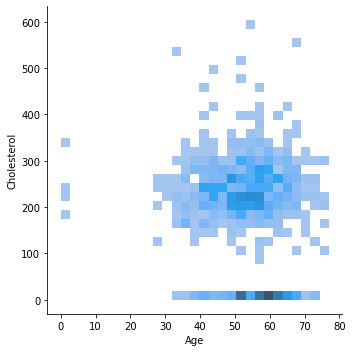

In [52]:
sns.displot(x = data['Age'], y = data['Cholesterol'], data = data)

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

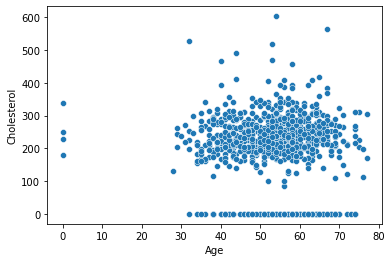

In [53]:
sns.scatterplot(x = data['Age'], y = data['Cholesterol'], data = data)

<AxesSubplot:xlabel='MaxHR', ylabel='Cholesterol'>

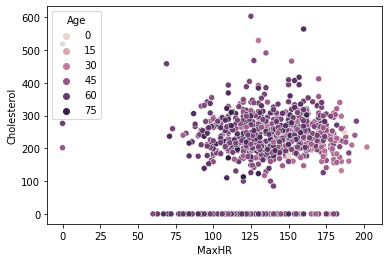

In [54]:
palette=['0-15:yellow','16-30:purple','31-45:blue', '46-60:green', '61-74:orange', '75:red']
sns.scatterplot(x = data['MaxHR'], y = data['Cholesterol'],hue = 'Age' , data = data)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

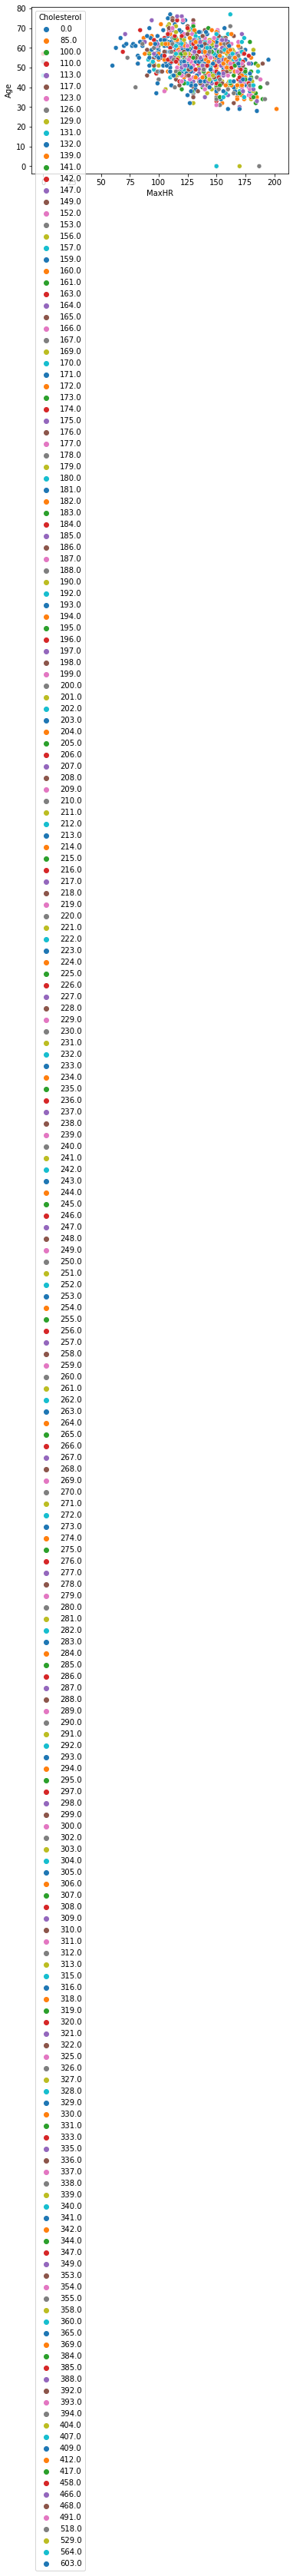

In [55]:
sns.scatterplot(x = data['MaxHR'], y = data['Age'],hue = 'Cholesterol',palette = 'tab10', data = data)
sns.color_palette("tab10")

<AxesSubplot:xlabel='MaxHR', ylabel='Cholesterol'>

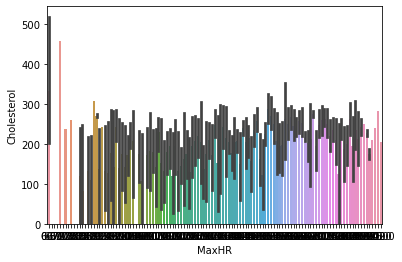

In [56]:
sns.barplot(x = data['MaxHR'], y = data['Cholesterol'])

## 9. Pair plots of numerical variables

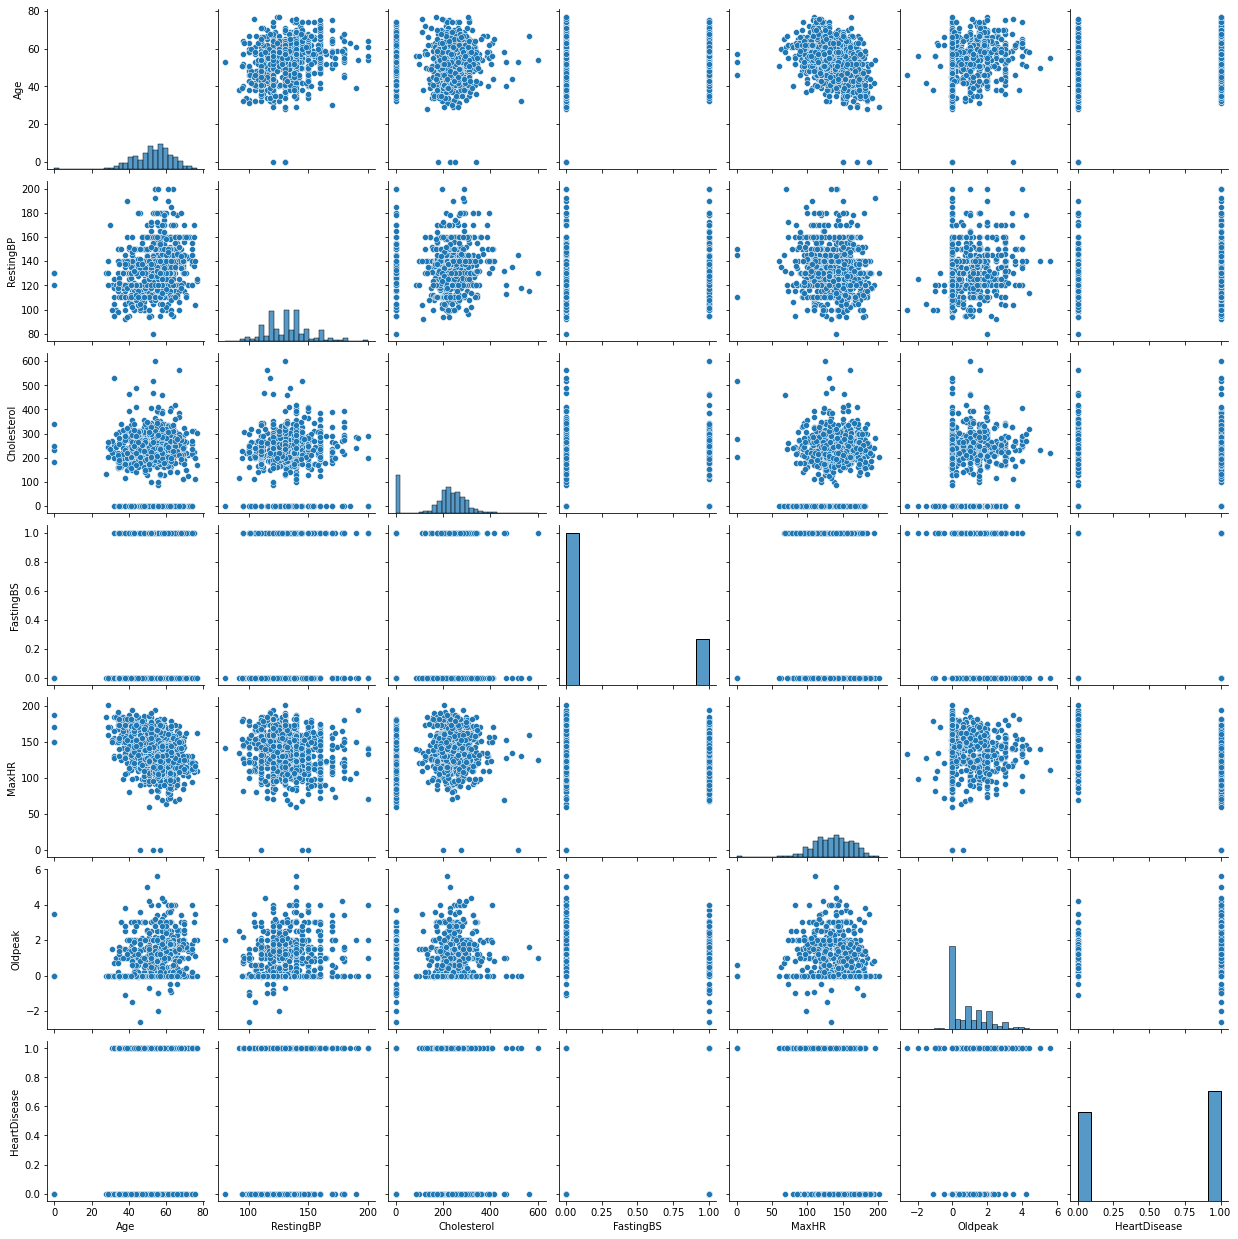

In [57]:
sns.pairplot(data)

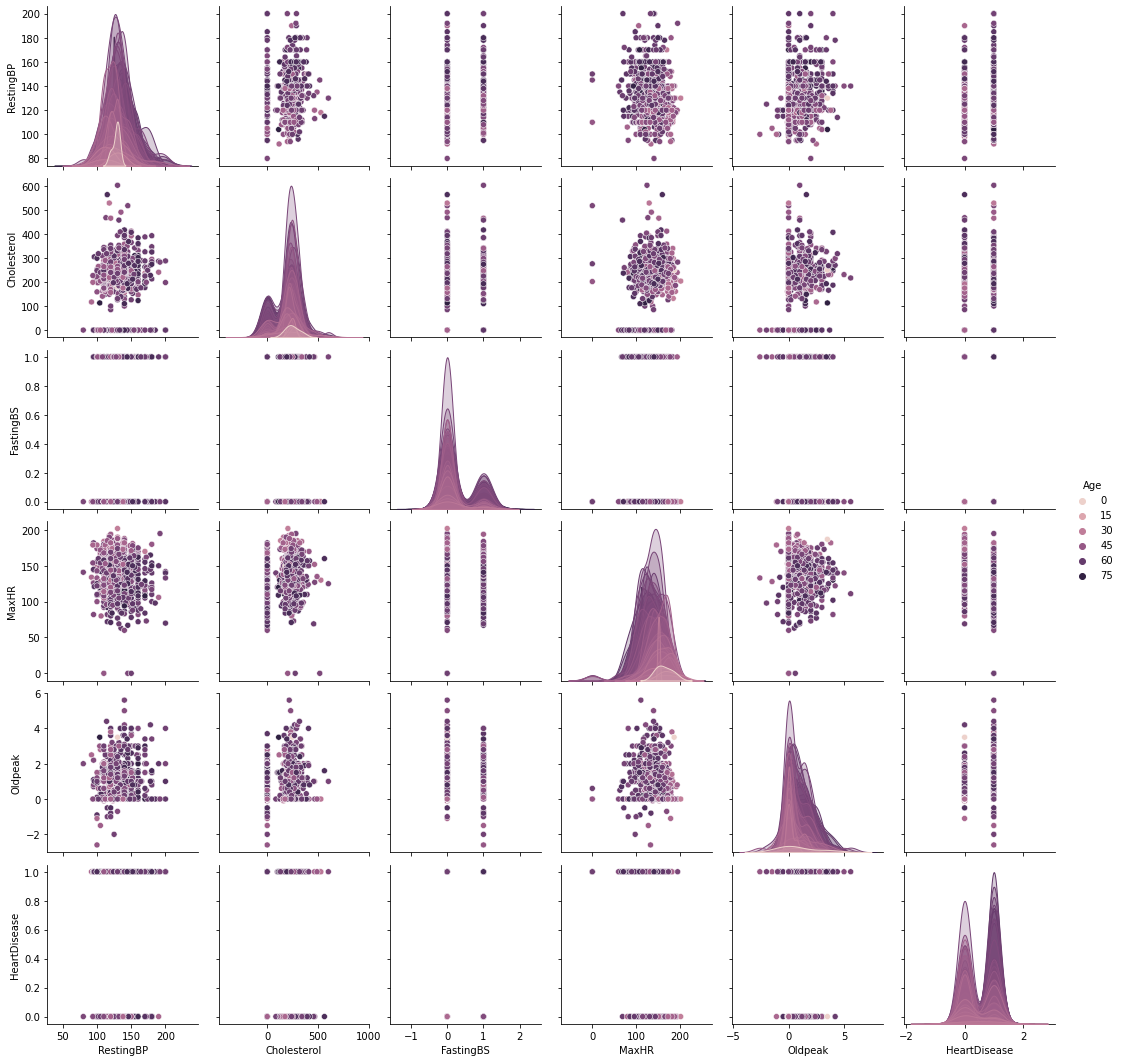

In [58]:
sns.pairplot(data, hue = 'Age')

## 10. Correlation Heat Map

<AxesSubplot:>

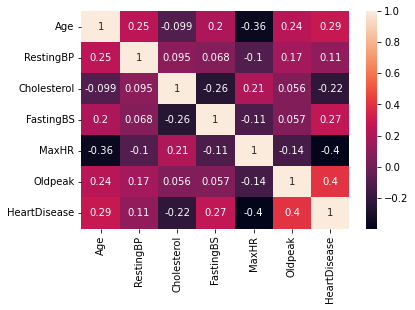

In [59]:
sns.heatmap(data.corr(), annot = True)

## 11. Drop unnecessary columns

In [60]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110.0,264.0,0.0,Normal,132.0,N,1.2,Flat,1
914,68.0,M,ASY,144.0,193.0,1.0,Normal,141.0,N,3.4,Flat,1
915,57.0,M,ASY,130.0,131.0,0.0,Normal,115.0,Y,1.2,Flat,1
916,57.0,F,ATA,130.0,236.0,0.0,LVH,174.0,N,0.0,Flat,1


In [61]:
data.drop('Age', axis = 1, inplace = True)

In [62]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [63]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [64]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

## 12. Encode categorical columns

In [65]:
le =  LabelEncoder()

In [66]:
data['Sex'] = le.fit_transform(data['Sex'])

In [67]:
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])

In [68]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
ohe = OneHotEncoder()

In [71]:
df=pd.DataFrame(ohe.fit_transform(data[['RestingECG']]).toarray(),columns = ['Normal', 'ST', 'LVH'])



In [72]:
df_c=pd.DataFrame(ohe.fit_transform(data[['ChestPainType']]).toarray(),columns =['ATA', 'NAP', 'ASY', 'TA'])

In [73]:
df_s=pd.DataFrame(ohe.fit_transform(data[['ST_Slope']]).toarray(),columns =['Up', 'Flat', 'Down'])

In [74]:
df_s

,Up,Flat,Down
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
896,0.0,1.0,0.0
897,0.0,1.0,0.0
898,0.0,1.0,0.0
899,0.0,1.0,0.0


In [75]:
df_c

,ATA,NAP,ASY,TA
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
896,0.0,0.0,0.0,1.0
897,1.0,0.0,0.0,0.0
898,1.0,0.0,0.0,0.0
899,0.0,1.0,0.0,0.0


In [76]:
df

,Normal,ST,LVH
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
896,0.0,1.0,0.0
897,0.0,1.0,0.0
898,0.0,1.0,0.0
899,1.0,0.0,0.0


## 13. Drop dummy variables to avoid multi-collinearity

In [77]:
df1  = data.join(df)

In [78]:
df1 = df1.join(df_c)

In [79]:
df1 = df1.join(df_s)

In [80]:
df1.drop('ChestPainType', axis = 1, inplace = True)
df1.drop('RestingECG', axis = 1, inplace = True)
df1.drop('ST_Slope', axis = 1, inplace = True)

In [82]:
df1.drop((df1['Normal'].isnull().sum()), axis = 0, inplace = True)

In [83]:
df1['Normal']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
913    NaN
914    NaN
915    NaN
916    NaN
917    NaN
Name: Normal, Length: 900, dtype: float64

In [84]:
df1['Normal'].isnull().sum()

16

In [85]:
df1.dropna(axis = 0, inplace = True)

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 900
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             884 non-null    int32  
 1   RestingBP       884 non-null    float64
 2   Cholesterol     884 non-null    float64
 3   FastingBS       884 non-null    float64
 4   MaxHR           884 non-null    float64
 5   ExerciseAngina  884 non-null    int32  
 6   Oldpeak         884 non-null    float64
 7   HeartDisease    884 non-null    int64  
 8   Normal          884 non-null    float64
 9   ST              884 non-null    float64
 10  LVH             884 non-null    float64
 11  ATA             884 non-null    float64
 12  NAP             884 non-null    float64
 13  ASY             884 non-null    float64
 14  TA              884 non-null    float64
 15  Up              884 non-null    float64
 16  Flat            884 non-null    float64
 17  Down            884 non-null    flo

In [96]:
df1

,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Normal,ST,LVH,ATA,NAP,ASY,TA,Up,Flat,Down
0,1,140.0,289.0,0.0,172.0,0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,160.0,180.0,0.0,156.0,0,1.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,130.0,283.0,0.0,98.0,0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,138.0,214.0,0.0,108.0,1,1.5,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,150.0,195.0,0.0,122.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,1,130.0,253.0,0.0,179.0,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
897,0,128.0,205.0,0.0,130.0,1,2.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
898,1,122.0,192.0,0.0,174.0,0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
899,1,148.0,203.0,0.0,161.0,0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [97]:
df1.isnull().sum()

Sex               0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
HeartDisease      0
Normal            0
ST                0
LVH               0
ATA               0
NAP               0
ASY               0
TA                0
Up                0
Flat              0
Down              0
dtype: int64

In [98]:
df1[df1.duplicated()]

,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Normal,ST,LVH,ATA,NAP,ASY,TA,Up,Flat,Down


In [99]:
df1.corr()

,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Normal,ST,LVH,ATA,NAP,ASY,TA,Up,Flat,Down
Sex,1.000000,0.016258,-0.194597,0.126870,-0.193685,0.202214,0.117092,0.318210,-0.086774,-0.033173,0.129893,0.098614,-0.051015,-0.081761,0.020367,0.030345,0.076247,-0.092544
RestingBP,0.016258,1.000000,0.096475,0.057545,-0.098613,0.149230,0.160900,0.112431,-0.042692,0.009445,0.031894,0.013627,-0.024327,0.000981,0.009987,0.042153,0.020695,-0.042484
Cholesterol,-0.194597,0.096475,1.000000,-0.257213,0.206372,-0.029466,0.057778,-0.225899,0.174824,-0.016537,-0.158114,-0.152748,0.137157,0.021818,0.062884,-0.039033,-0.114636,0.135765
FastingBS,0.126870,0.057545,-0.257213,1.000000,-0.108693,0.061021,0.049101,0.268323,-0.012731,-0.052005,0.077623,0.082424,-0.116927,0.015064,-0.009279,0.112939,0.006763,-0.064653
MaxHR,-0.193685,-0.098613,0.206372,-0.108693,1.000000,-0.358159,-0.141950,-0.399016,0.161720,0.042821,-0.218471,-0.128085,0.075541,0.046190,0.069407,0.025956,-0.102397,0.090131
ExerciseAngina,0.202214,0.149230,-0.029466,0.061021,-0.358159,1.000000,0.421664,0.497512,0.009727,-0.096494,0.109948,0.069419,-0.073372,-0.010280,-0.008670,0.054641,0.071730,-0.100422
Oldpeak,0.117092,0.160900,0.057778,0.049101,-0.141950,0.421664,1.000000,0.402612,0.036353,-0.053423,0.029225,-0.001072,-0.055868,0.028762,0.046023,0.061110,0.002088,-0.033397
HeartDisease,0.318210,0.112431,-0.225899,0.268323,-0.399016,0.497512,0.402612,1.000000,-0.048739,-0.066497,0.132427,0.123358,-0.124898,-0.035248,0.006742,0.093270,0.067996,-0.116428
Normal,-0.086774,-0.042692,0.174824,-0.012731,0.161720,0.009727,0.036353,-0.048739,1.000000,-0.625352,-0.244975,0.009060,-0.093159,0.030650,0.084736,0.040518,0.018565,-0.039495
ST,-0.033173,0.009445,-0.016537,-0.052005,0.042821,-0.096494,-0.053423,-0.066497,-0.625352,1.000000,-0.603369,-0.063445,0.112358,0.004270,-0.061418,-0.054687,-0.053747,0.082282


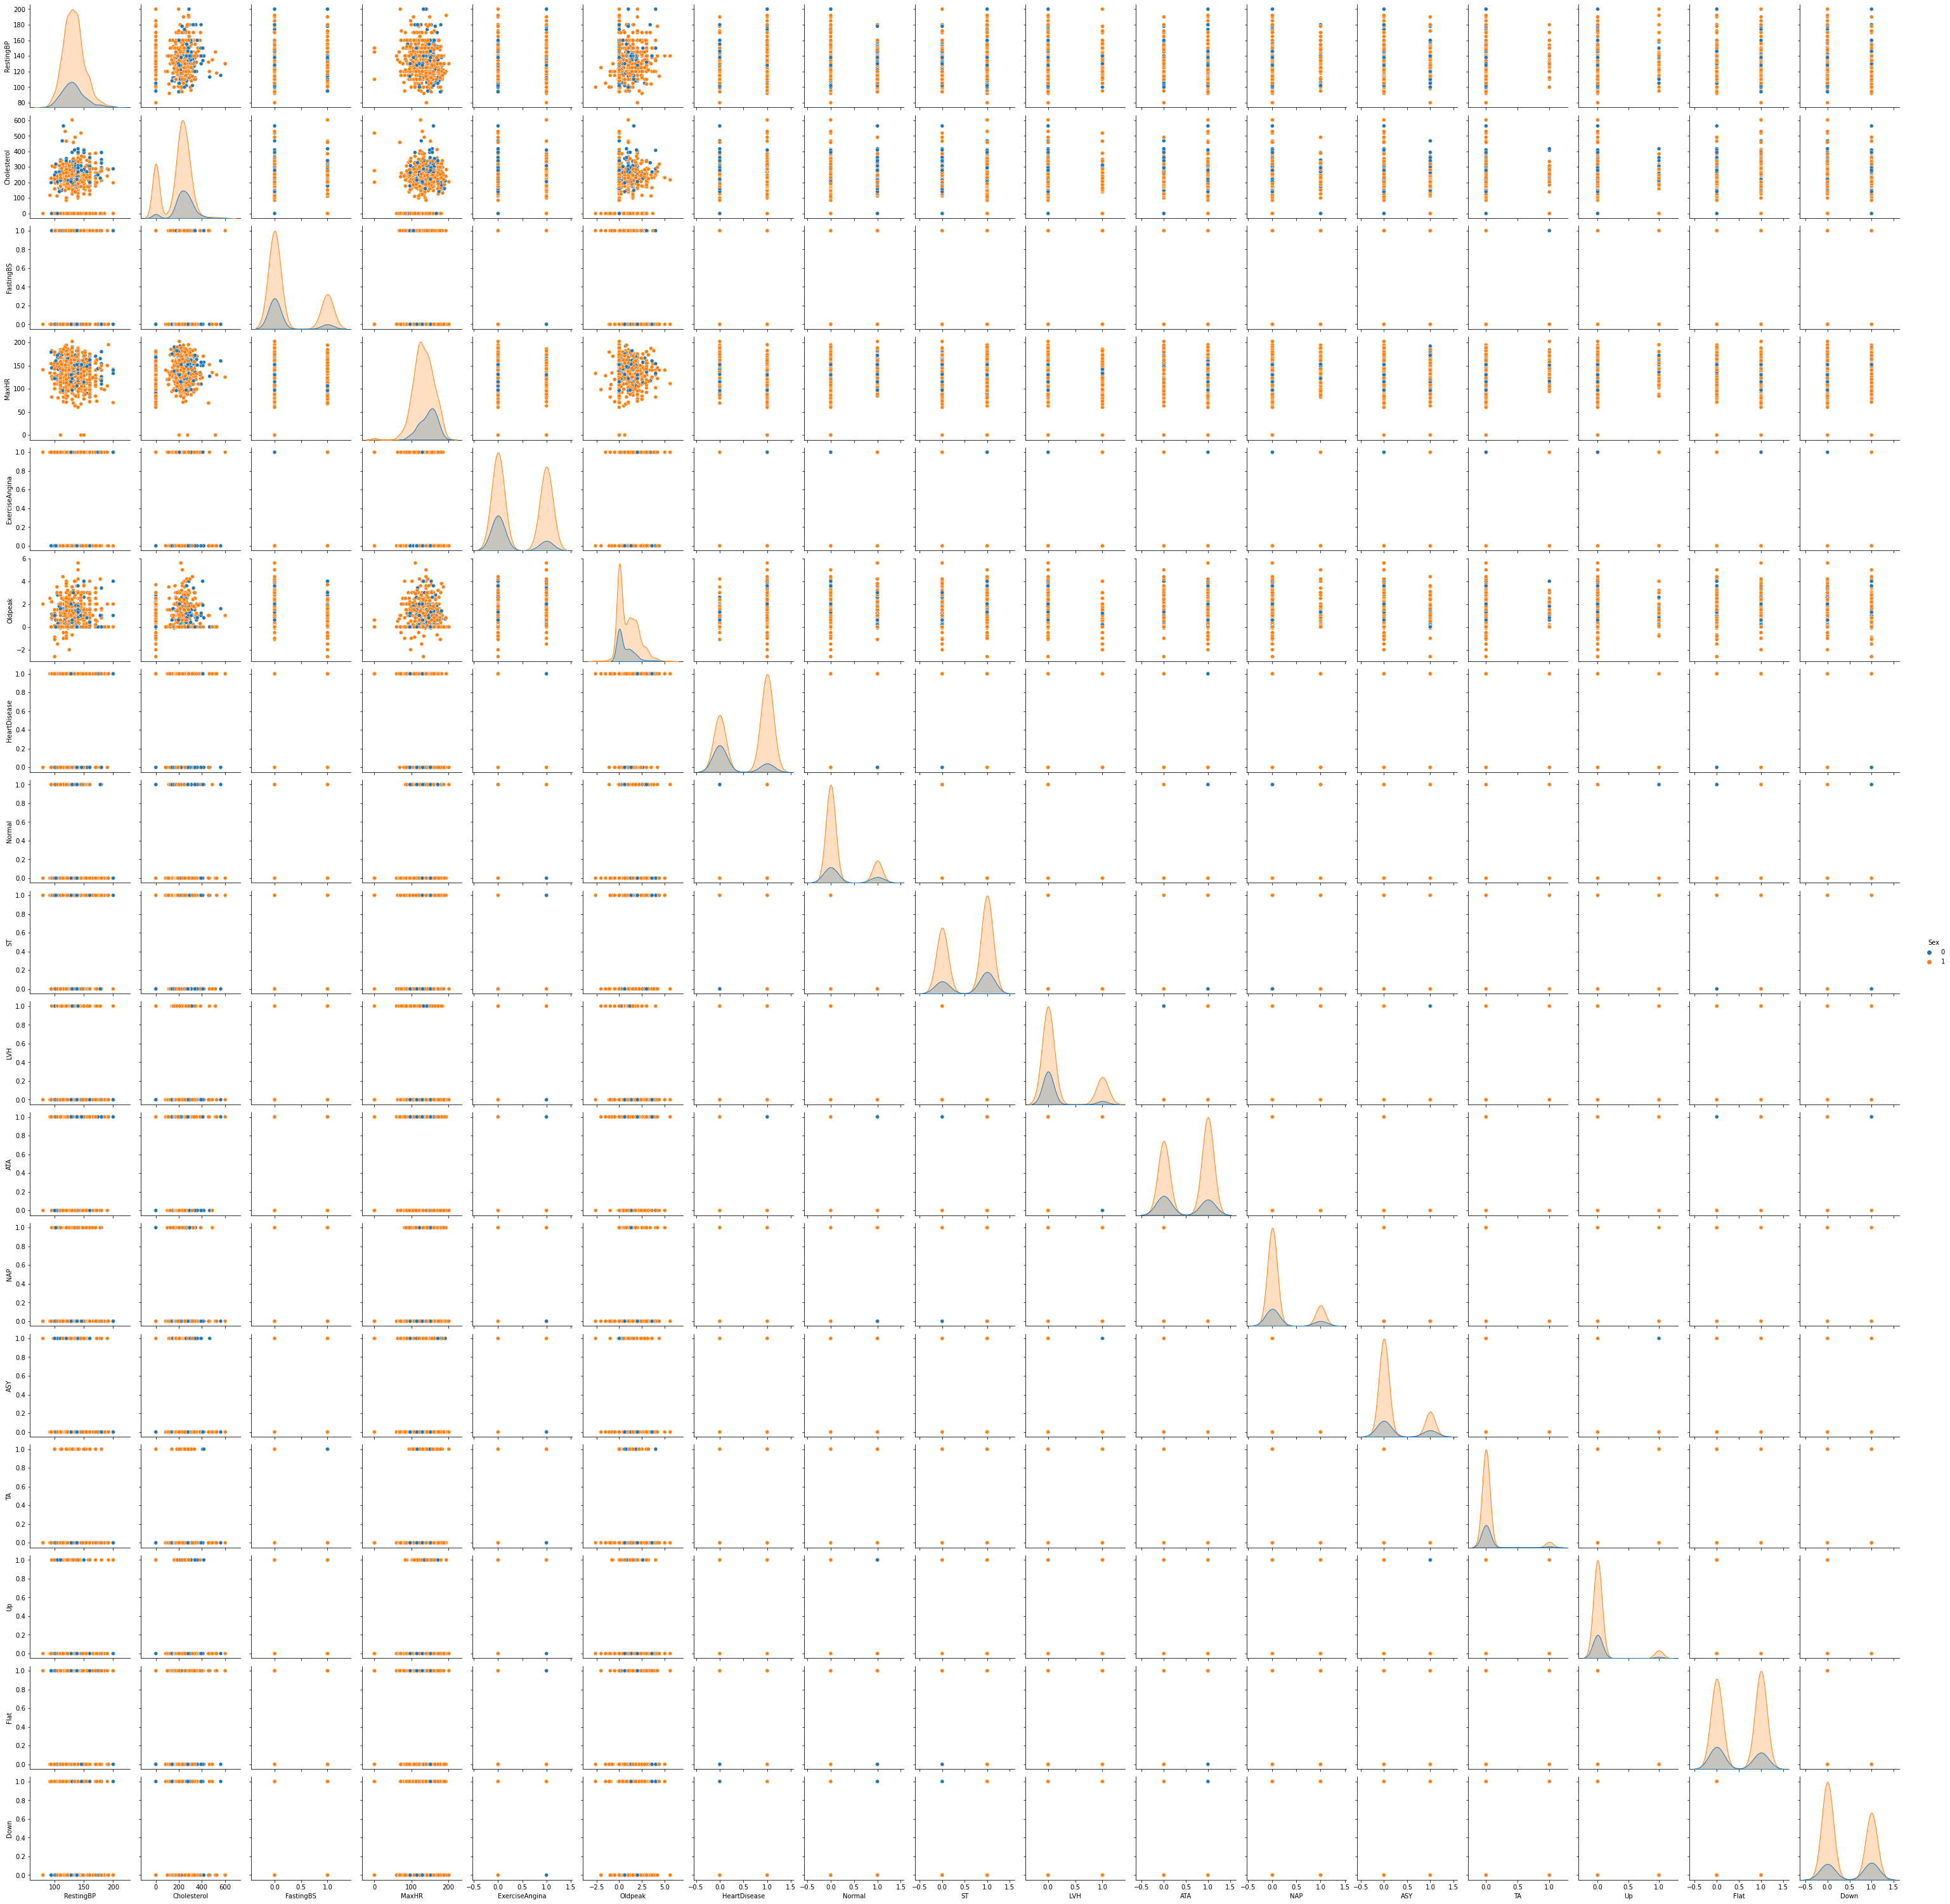

In [92]:
sns.pairplot(df1, hue = 'Sex')

In [93]:
df1.describe()

,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Normal,ST,LVH,ATA,NAP,ASY,TA,Up,Flat,Down
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,0.790724,132.576923,198.593891,0.234163,135.898190,0.409502,0.880656,0.550905,0.202489,0.606335,0.191176,0.544118,0.183258,0.220588,0.052036,0.069005,0.501131,0.429864
std,0.407022,18.094873,110.999919,0.423714,26.703371,0.492020,1.050815,0.497684,0.402082,0.488839,0.393450,0.498332,0.387097,0.414878,0.222226,0.253605,0.500282,0.495337
min,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,120.000000,172.750000,0.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,130.000000,223.000000,0.000000,137.000000,0.000000,0.600000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,140.000000,268.250000,0.000000,155.000000,1.000000,1.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,5.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 14. Split into training and testing data - 80:20 split

In [100]:
x = df1.drop('HeartDisease', axis = 1).values
y = df1['HeartDisease'].values

In [101]:
x1 = df1.drop(['HeartDisease','RestingBP','Normal','ST','ASY','TA','Up','Flat'], axis = 1).values #model2

In [137]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.20, random_state = 20)

## 15. Perform feature scaling

In [138]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [139]:
X_test = scaler.transform(X_test)

In [140]:
X_train

array([[ 0.521136  ,  0.98914889, -0.10753005, ..., -0.28176109,
         1.00141543, -0.86352708],
       [ 0.521136  , -0.12345673,  1.07775678, ..., -0.28176109,
         1.00141543, -0.86352708],
       [-1.91888489, -0.67975955,  0.09461189, ..., -0.28176109,
        -0.99858657,  1.15804128],
       ...,
       [-1.91888489,  2.65805733,  1.30746353, ..., -0.28176109,
        -0.99858657,  1.15804128],
       [ 0.521136  ,  0.3772158 ,  0.11298843, ..., -0.28176109,
         1.00141543, -0.86352708],
       [ 0.521136  ,  1.2673003 , -1.88086616, ..., -0.28176109,
         1.00141543, -0.86352708]])

## 16. Build Logistic regression model


In [141]:
reg=LogisticRegression()

In [142]:
reg.fit(X_train,Y_train)

LogisticRegression()

In [143]:
Y_pred=reg.predict(X_test)

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[56, 14],
       [18, 89]], dtype=int64)

[]

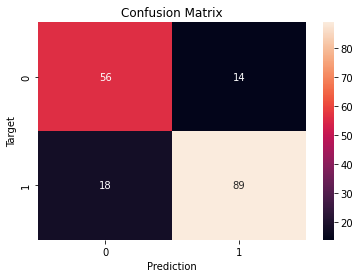

In [145]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, Y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')
plt.plot()

In [146]:
tp  = 75
tn = 71
fp = 8
fn = 23

## 17. Check F score, 18. Calculate precision and recall


In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8192090395480226

In [148]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        70
           1       0.86      0.83      0.85       107

    accuracy                           0.82       177
   macro avg       0.81      0.82      0.81       177
weighted avg       0.82      0.82      0.82       177



<AxesSubplot:xlabel='Sex', ylabel='Density'>

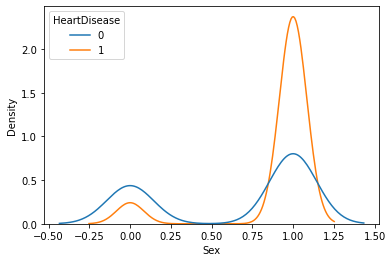

In [149]:
sns.kdeplot(df1['Sex'], hue=df1['HeartDisease'])

In [150]:
recall =tp/(tp+fn)
precision = (tp/(tp+fp))

In [151]:
recall

0.7653061224489796

In [152]:
precision

0.9036144578313253

In [153]:
f1_score=(2*precision*recall)/(precision+recall)

In [154]:
f1_score

0.8287292817679558